In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
data = pd.read_csv(r'train.csv')
data1 = pd.read_csv(r'test.csv')

In [4]:
data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('Total No Of ROWs =',data.shape[0])
print('Total No Of COLUMNs =',data.shape[1])

Total No Of ROWs = 1460
Total No Of COLUMNs = 81


In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
missing_value =data.isnull().sum()
missing_col=[]
for i in range(len(missing_value)):
    if missing_value.values[i] !=0:
        missing_col.append(missing_value.keys()[i])

In [9]:
a=[]
b=[]
c=[]
for i in range(0,len(missing_col),1): 
    a.append(missing_col[i])
    b.append(data[missing_col[i]].isnull().sum())
    c.append(round((data[missing_col[i]].isnull().sum())*100/data.shape[0],2))
#     print(missing_col[i],' : ',data[missing_col[i]].isnull().sum(),'  :  ',round((data[missing_col[i]].isnull().sum())*100/1460,2),'%')

In [10]:
display(HTML('<pre><b>               Missing columns</b></pre>'))
df=pd.DataFrame({'columns':a,'missing values':b,'missing percentage':c})
df 

,columns,missing values,missing percentage
0,LotFrontage,259,17.74
1,Alley,1369,93.77
2,MasVnrType,8,0.55
3,MasVnrArea,8,0.55
4,BsmtQual,37,2.53
5,BsmtCond,37,2.53
6,BsmtExposure,38,2.60
7,BsmtFinType1,37,2.53
8,BsmtFinType2,38,2.60
9,Electrical,1,0.07


In [11]:
allcol=data.nunique().sort_values().keys()[:-1]

In [12]:
sapret_column=[]
for i in range(len(allcol)):
    a=data[allcol[i]].value_counts()
    if len(a) >= 15:
        break;
    sapret_column.append(allcol[i])
    display(HTML(f'---------------- <b>  {allcol[i]}  </b> ----------------'))
    print(a)

Y    1365
N      95
Name: CentralAir, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Grvl    50
Pave    41
Name: Alley, dtype: int64


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


0    913
1    535
2     12
Name: HalfBath, dtype: int64


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


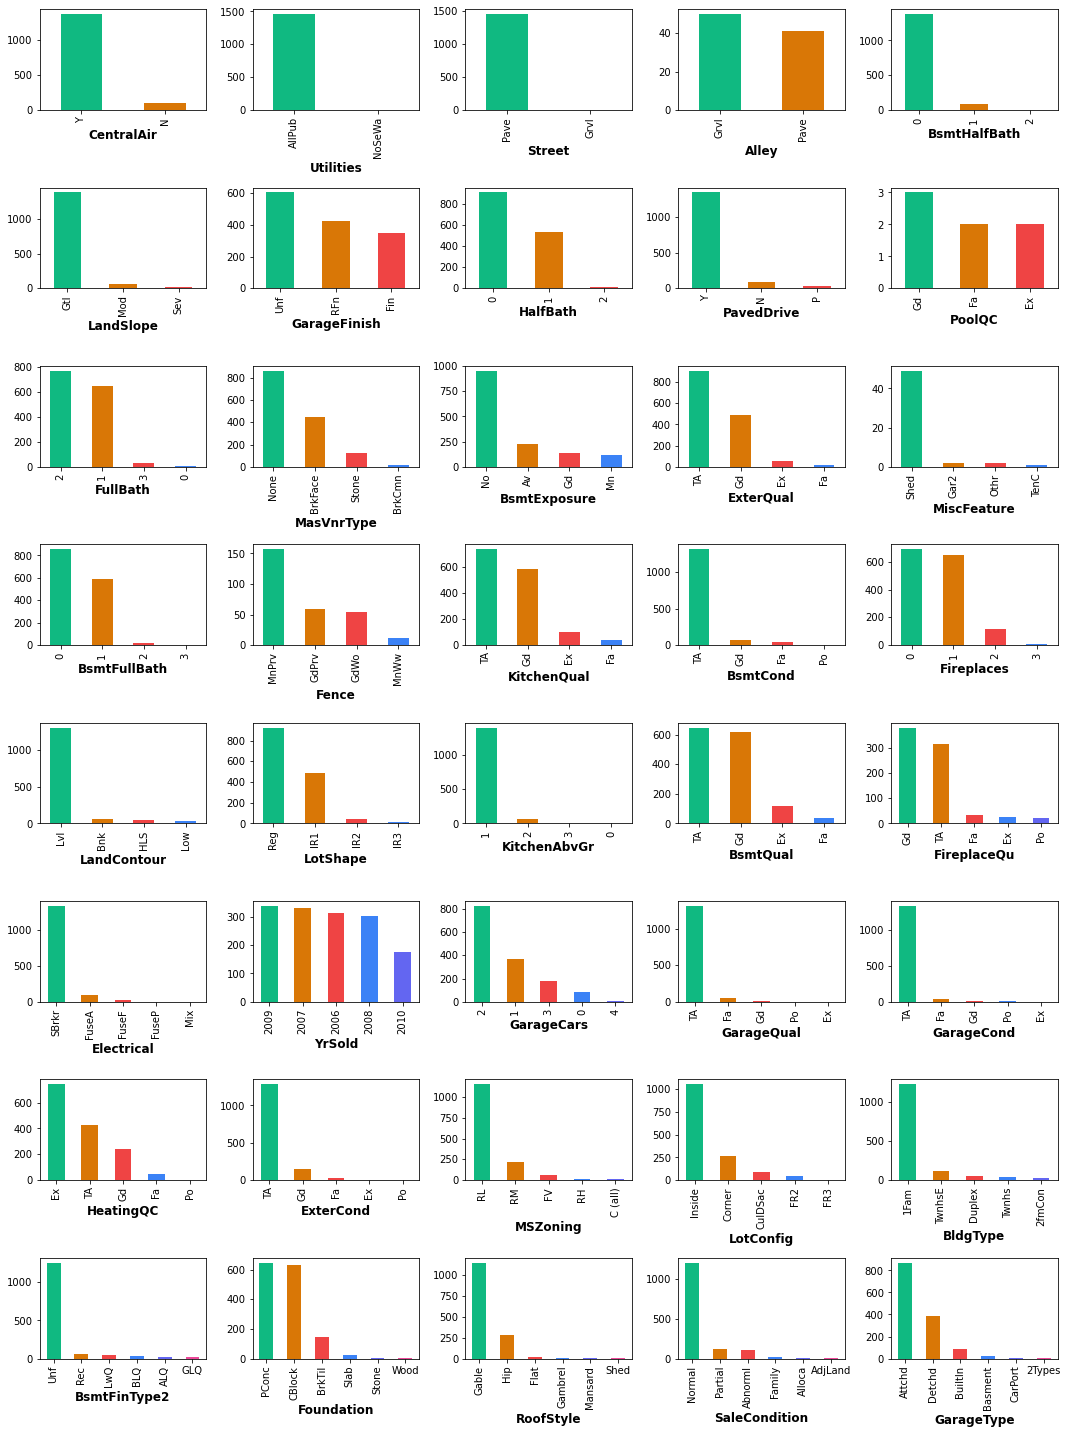

In [13]:
plt.figure(figsize=(15,20))
for i in range(len(sapret_column)):
    if i == 40:
        break;
    plt.subplot(8,5,i+1)
    plt.tight_layout() # for maintain spaceing between multple graphs
    plt.xlabel(sapret_column[i],fontsize=12.0,fontweight='bold') 
    data[sapret_column[i]].value_counts().plot(kind="bar", color = ['#10B981','#D97706','#EF4444','#3B82F6','#6366F1','#EC4899'])  
#   sns.countplot(data=dataset,x=col_key[i])

In [14]:
a = round((data.isnull().mean()*100),2)
mssingcolumn=[]
missingdata=[]
missingnum=[]
for i in range(len(a)):
    if a.values[i] != 0:
        mssingcolumn.append(a.keys()[i])
for i in mssingcolumn:
    missingdata.append(round((data[i].isnull().mean()*100),2))
    missingnum.append(data[i].isnull().sum())
missing=pd.DataFrame({'column':mssingcolumn,'missing percent':missingdata,'missing num':missingnum}) 
missing

,column,missing percent,missing num
0,LotFrontage,17.74,259
1,Alley,93.77,1369
2,MasVnrType,0.55,8
3,MasVnrArea,0.55,8
4,BsmtQual,2.53,37
5,BsmtCond,2.53,37
6,BsmtExposure,2.60,38
7,BsmtFinType1,2.53,37
8,BsmtFinType2,2.60,38
9,Electrical,0.07,1


<AxesSubplot:ylabel='LotFrontage'>

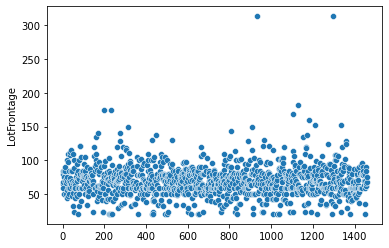

In [15]:
sns.scatterplot(x=data.index , y=data['LotFrontage'])

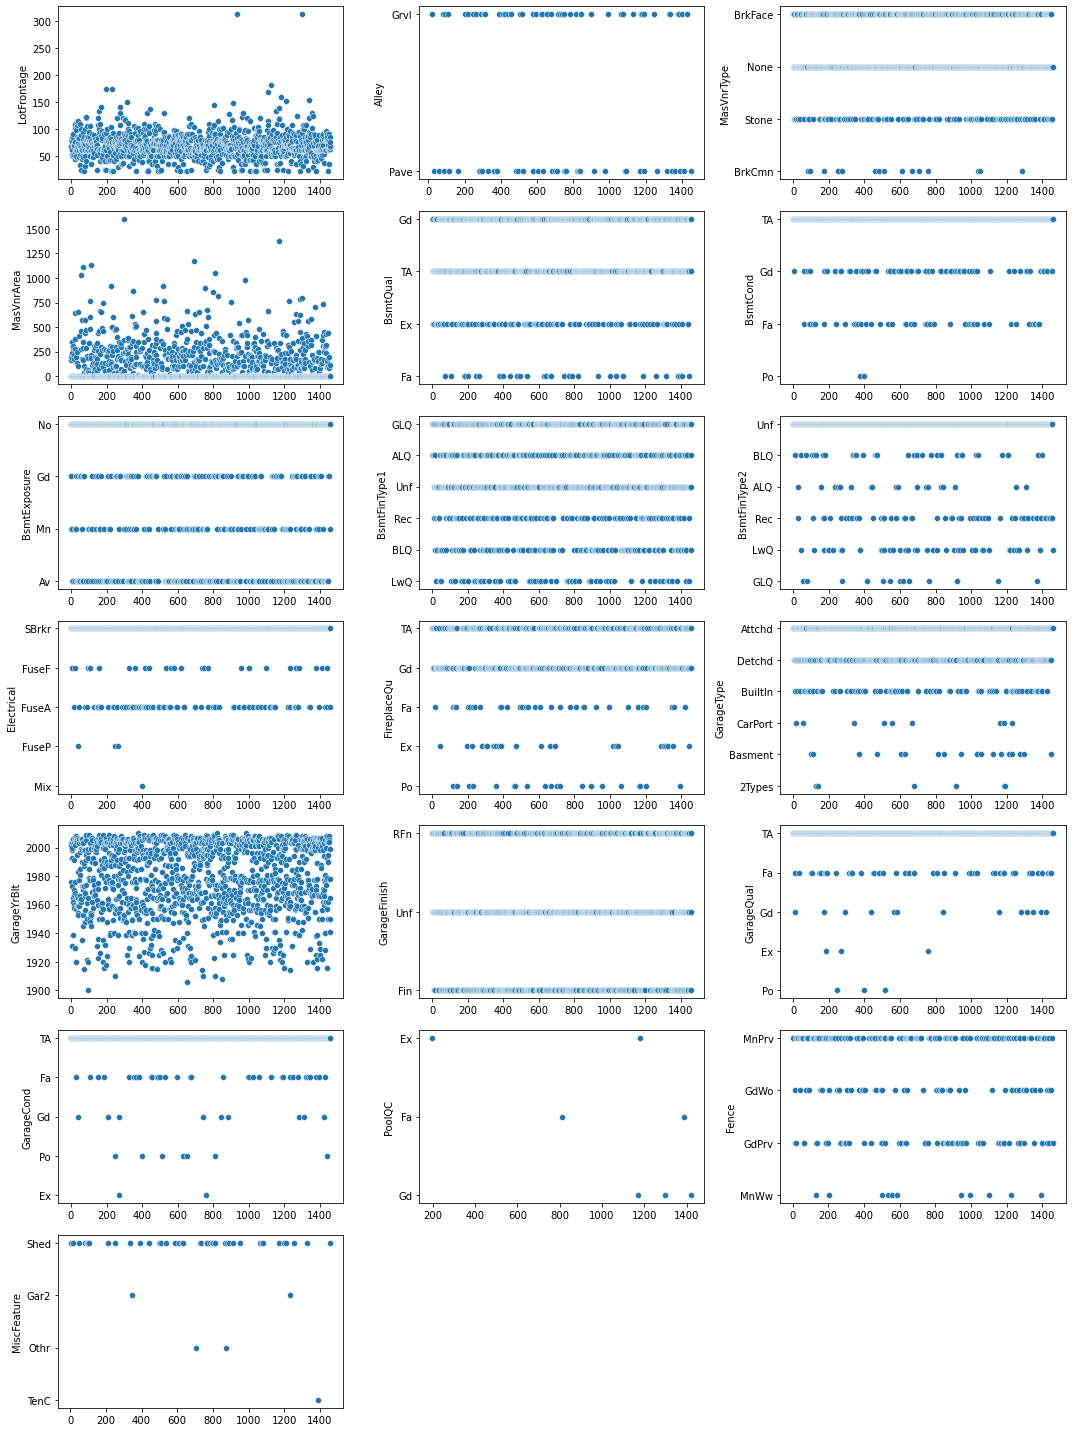

In [16]:
# all missing data scatter plot
plt.figure(figsize=(15,20))
for i in range(len(mssingcolumn)):
    plt.subplot((len(mssingcolumn)/3)+1,3,i+1) 
    plt.tight_layout()
    sns.scatterplot(x=data.index , y=data[mssingcolumn[i]])

In [17]:
# # all scatter plot
# plt.figure(figsize=(15,20))
# for i in range(len(data.columns)):
#     plt.subplot((len(data.columns)/3)+1,3,i+1) 
#     plt.tight_layout()
#     sns.scatterplot(x=data.index , y=data[data.columns[i]])

# very log time process 

<AxesSubplot:>

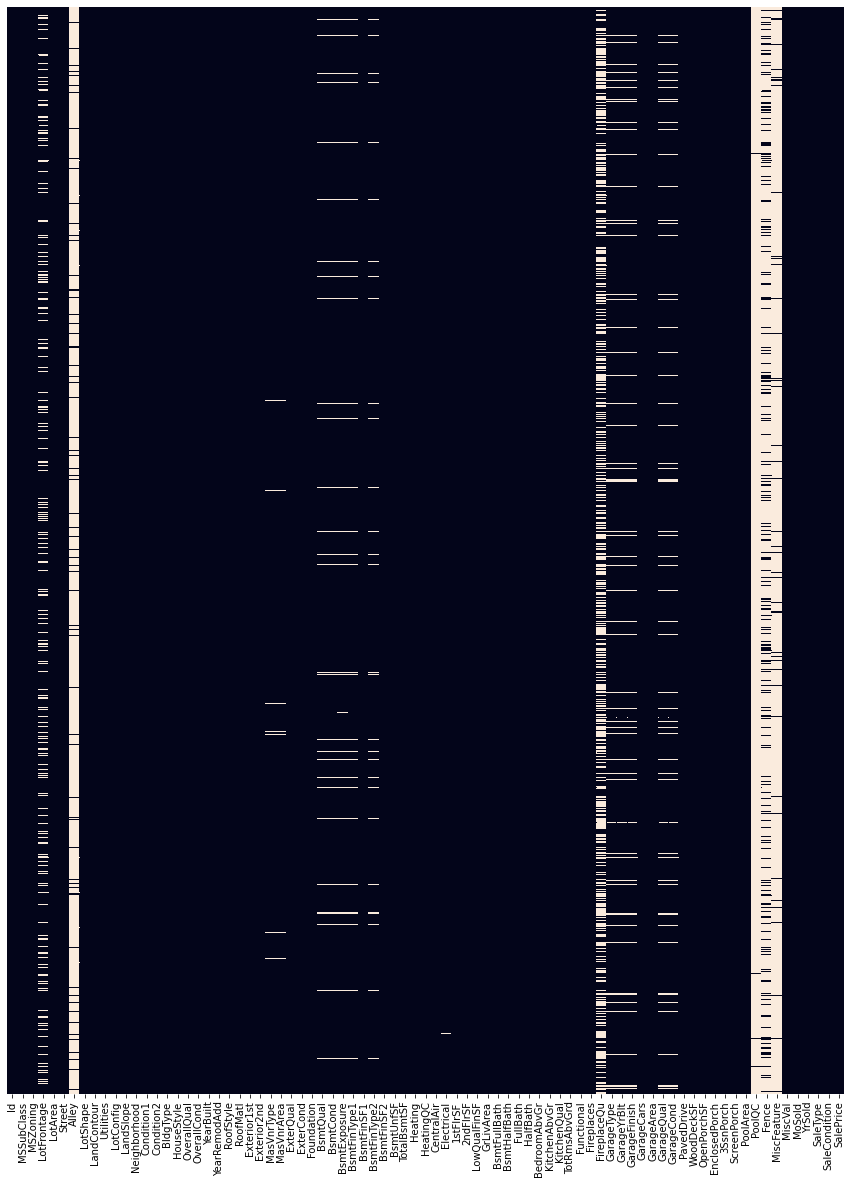

In [18]:
plt.figure(figsize=(15,20))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

# Outliers Handle 

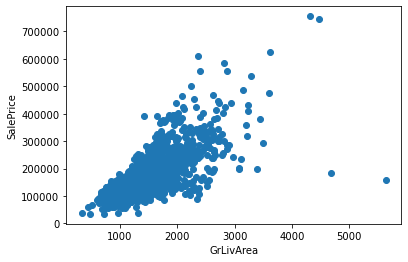

In [19]:
plt.scatter(x=data['GrLivArea'],y=data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [20]:
# delete outliners
data = data.drop(data[data['GrLivArea']>4000].index)

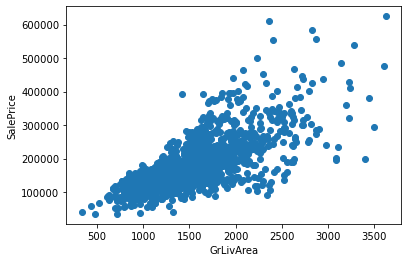

In [21]:
plt.scatter(x=data['GrLivArea'],y=data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

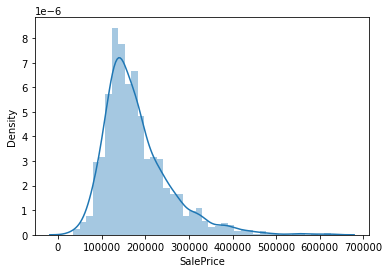

In [22]:
sns.distplot(data['SalePrice']) #right side skewd we have to convert into log for better price prediction

# Feature Enginering

In [23]:
ntrain = data.shape[0]
ntest= data1.shape[0]
y_train = data.SalePrice.values
alldata=pd.concat((data,data1)).reset_index(drop=True)
alldatacopy=alldata.copy() # copy alldata
alldata.drop(['SalePrice'],axis=1,inplace=True)
alldata.drop(['Id'],axis=1,inplace=True)
alldata.shape 

(2915, 79)

Missing data of <b>alldata</b> conacated data

In [24]:
def alldata_missing():
    a = round((alldata.isnull().mean()*100),2)
    mssingcolumn=[]
    missingdata=[]
    missingnum=[] 
    for i in range(len(a)):
        if a.values[i] != 0:
            mssingcolumn.append(a.keys()[i])
    for i in mssingcolumn:
        missingdata.append(round((alldata[i].isnull().mean()*100),3))
        missingnum.append(alldata[i].isnull().sum())
    missing=pd.DataFrame({'column':mssingcolumn,'missing percent':missingdata,'missing num':missingnum}) 
    print(missing)
    
alldata_missing()

          column  missing percent  missing num
0       MSZoning            0.137            4
1    LotFrontage           16.672          486
2          Alley           93.208         2717
3      Utilities            0.069            2
4    Exterior1st            0.034            1
5    Exterior2nd            0.034            1
6     MasVnrType            0.823           24
7     MasVnrArea            0.789           23
8       BsmtQual            2.779           81
9       BsmtCond            2.813           82
10  BsmtExposure            2.813           82
11  BsmtFinType1            2.710           79
12    BsmtFinSF1            0.034            1
13  BsmtFinType2            2.744           80
14    BsmtFinSF2            0.034            1
15     BsmtUnfSF            0.034            1
16   TotalBsmtSF            0.034            1
17    Electrical            0.034            1
18  BsmtFullBath            0.069            2
19  BsmtHalfBath            0.069            2
20   KitchenQ

<AxesSubplot:>

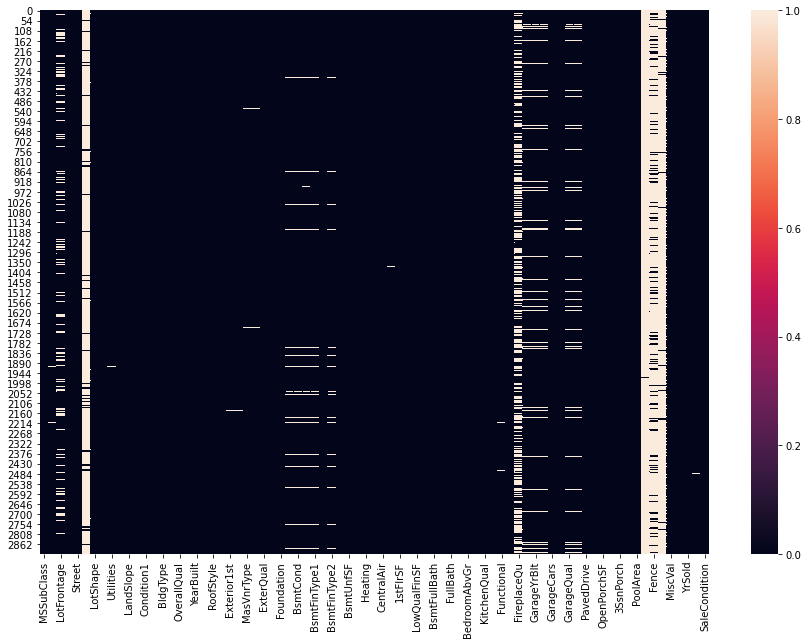

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(alldata.isnull())

<AxesSubplot:>

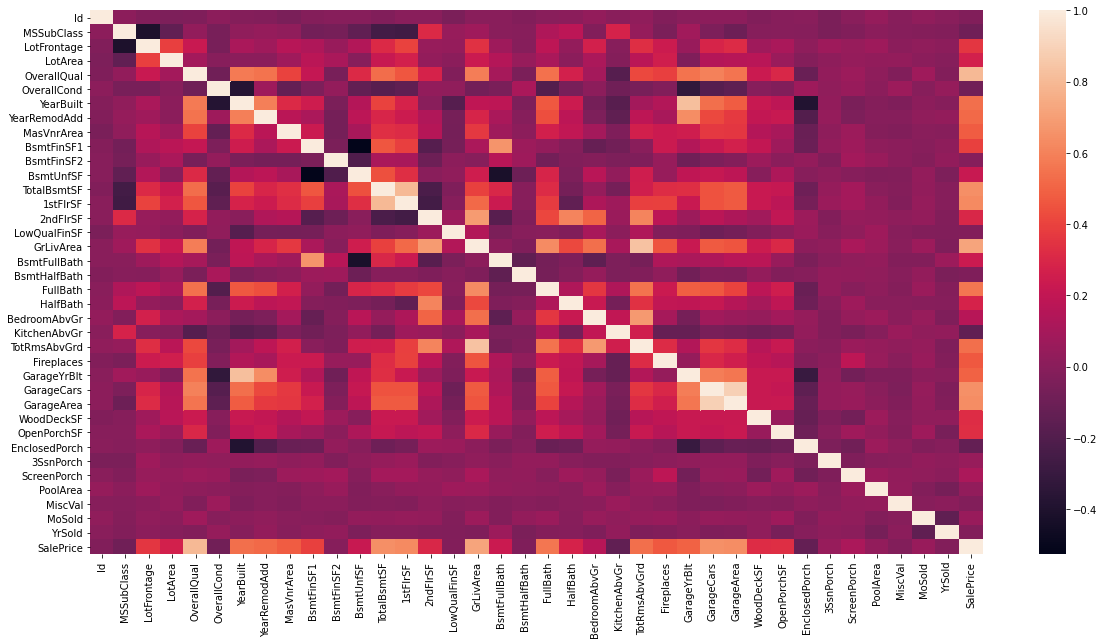

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr())

# Handal Delete missing data

In [27]:
for i in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MSSubClass'):
    alldata[i]=alldata[i].fillna('none')

In [28]:
for i in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrType','MasVnrArea'):
    alldata[i]=alldata[i].fillna(0)

In [29]:
alldata['LotFrontage']=alldata.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [30]:
alldata['MSZoning']=alldata['MSZoning'].fillna(alldata['MSZoning'].mode()[0])

In [31]:
alldata=alldata.drop(['Utilities'],axis=1)

In [32]:
alldata['Functional']=alldata['Functional'].fillna('typical')

In [33]:
# replace with mode
for i in ('Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    alldata[i]=alldata[i].fillna(alldata[i].mode()[0])

In [34]:
# no missing column
alldata_missing() 

Empty DataFrame
Columns: [column, missing percent, missing num]
Index: []


In [35]:
alldata['MSSubClass']=alldata['MSSubClass'].apply(str)


for i in ('OverallCond','YrSold','MoSold'):
    alldata[i]=alldata[i].astype(str)

In [36]:
alldata 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,160,RM,21.0,1936,Pave,none,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,none,none,0.0,none,0.0,0.0,none,none,Y,0,0,0,0,0,0,none,none,none,0,6,2006,WD,Normal
2911,160,RM,21.0,1894,Pave,none,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,none,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,none,none,none,0,4,2006,WD,Abnorml
2912,20,RL,160.0,20000,Pave,none,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,none,none,none,0,9,2006,WD,Abnorml
2913,85,RL,62.0,10441,Pave,none,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970

In [37]:
from sklearn.preprocessing import LabelEncoder
cols=('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
 
for i in cols:
    encodlb=LabelEncoder()
    encodlb.fit(list(alldata[i].values))
    alldata[i]=encodlb.transform(list(alldata[i].values))

alldata

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,2,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,3,3,2,706.0,5,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,Attchd,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,none,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,2,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,3,1,0,978.0,5,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,Attchd,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,none,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,2,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,3,2,2,486.0,5,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,Attchd,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,none,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,2,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,3,1,3,0,216.0,5,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,none,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,2,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,3,0,2,655.0,5,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,Attchd,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,none,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2,RM,21.0,1936,1,2,3,Lvl,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,3,3,3,5,0.0,5,0.0,546.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,5,none,0.0,3,0.0,0.0,5,5,2,0,0,0,0,0,0,3,4,none,0,8,0,WD,Normal
2911,2,RM,21.0,1894,1,2,3,Lvl,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,3,3,3,4,252.0,5,0.0,294.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,5,CarPort,1970.0,2,1.0,286.0,4,4,2,0,24,0,0,0,0,3,4,none,0,6,0,WD,Abnorml
2912,5,RL,160.0,20000,1,2,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,3,0,1224.0,5,0.0,0.0,1224.0,GasA,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,4,Detchd,1960.0,2,2.0,576.0,4,4,2,474,0,0,0,0,0,3,4,none,0,11,0,WD,Abnorml
2913,14,RL,62.0,10441,1,2,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,3,0,2,337.0,5,0.0,575.0,912.0,GasA,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,5,none,0.0,3,0.0,0.0,5,5,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal


In [38]:
# merge 3 column into 1 column
alldata['TotalSF']=alldata['TotalBsmtSF'] + alldata['1stFlrSF'] + alldata['2ndFlrSF']

In [65]:
#skewed features
from scipy.stats import skew 
numeric_feat = alldata.dtypes[alldata.dtypes != 'object'].index
skewed_feat = alldata[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feat})
skewness


Skew in numerical features: 



,Skew
Condition2_RRAe,53.962953
RoofMatl_Metal,53.962953
RoofMatl_Membran,53.962953
Condition2_RRAn,53.962953
Exterior2nd_Other,53.962953
...,...
Heating_GasA,-7.860881
RoofMatl_CompShg,-8.252989
Condition2_Norm,-9.875591
Street,-15.489377


In [40]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    alldata[feat] = boxcox1p(alldata[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [41]:
# convert into dummies coz, we want all data into numeric form only
alldata = pd.get_dummies(alldata)
print(alldata.shape)

(2915, 221)


In [42]:
main_data=alldata.copy()

###  Training and Testing Splits

In [43]:
x = alldata[:ntrain] # ntrain is show the shape on above data.shape[0] 

In [44]:
# y = pd.DataFrame(y_train)
# y = pd.DataFrame(data.iloc[0:,[-1]])
y = pd.DataFrame(np.log(data.iloc[0:,[-1]])) 
y 

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=63)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1164, 221)
(292, 221)
(1164, 1)
(292, 1)


In [47]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
regressor_model = GradientBoostingRegressor(learning_rate=0.05,n_estimators=3000)
regressor_model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=3000)

In [48]:
model_accuracy=round((regressor_model.score(x_test,y_test)*100),2)
HTML(f'Model Accuracy : <b>{ model_accuracy }%</b>')

In [49]:
# predict model for our test data
from sklearn import metrics 

y_predict=regressor_model.predict(x_test)


In [50]:
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error
r2=r2_score(y_test,y_predict)
MSLE=mean_squared_log_error(y_test,y_predict)
print('R Square value : ',r2) # accurecy
print('Root Mean Square Logarithmic Error : ',MSLE**0.5) 

R Square value :  0.9133914625002095
Root Mean Square Logarithmic Error :  0.008949116221242165


In [51]:
# import pickle
# filename= 'finalized_model.pkl'
# pickle.dump(GBest,open(filename,'wb'))

In [52]:
# #create sample submmison file and submit
# pred=pd.DataFrame(y_predict)
# # sub_df=pd.read_csv('sample_submission.csv')
# datasets=pd.concat(data1['Id'],pred,axis=1)
# datasets.columns=['Id','SalePrice']
# datasets.to_csv('sample_submission.csv',index=False)

Skewness : SalePrice    0.065449
dtype: float64


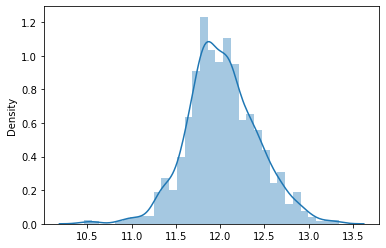

In [53]:
sns.distplot(y), print('Skewness :',y.skew())
plt.show()

In [54]:
# # Prints R2 and RMSE scores
# def get_score(prediction, lables):    
#     print('R2: {}'.format(r2_score(prediction, lables)))
#     print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
#     prediction_train = estimator.predict(x_trn)
#     # Printing estimator
#     print(estimator)
#     # Printing train scores
#     get_score(prediction_train, y_trn)
#     prediction_test = estimator.predict(x_tst)
#     # Printing test scores
#     print("Test")
#     get_score(prediction_test, y_tst) 

In [55]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import r2_score,mean_squared_error

# GBest = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
# train_test(GBest, x_train, x_test, y_train, y_test)

In [56]:
# y_test.shape

In [57]:
# y_predict.shape

In [58]:
# from sklearn.model_selection import KFold,cross_val_score 

In [59]:
# x_train.shape,y_train.shape 

In [60]:
#Validation function
# n_folds = 5

# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
#     rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

In [61]:
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)

In [62]:
# score = rmsle_cv(GBoost)
# print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))